### Construction de cartes interactives avec folium

  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.23.26 requires urllib3<1.27,>=1.25.4, but you have urllib3 1.22 which is incompatible.
boto3 1.26.13 requires botocore<1.30.0,>=1.29.13, but you have botocore 1.23.26 which is incompatible.
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.22
    Uninstalling urllib3-1.22:
      Successfully uninstalled urllib3-1.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.26.13 r

Downloading: : 63.3kiB [00:00, 11.7MiB/s]
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed
Downloading: : 3.68MiB [00:00, 53.7MiB/s]
Downloading: : 360kiB [00:00, 42.1MiB/s]
Downloading: : 807kiB [00:00, 45.2MiB/s]
Downloading: : 724kiB [00:00, 53.5MiB/s]
Downloading: : 2.61MiB [00:00, 61.1MiB/s]
Downloading: : 15.5MiB [00:00, 53.7MiB/s]
Downloading: : 4.38MiB [00:00, 47.1MiB/s]


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1268 entries, 0 to 258
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          1268 non-null   object  
 1   NOM         1268 non-null   object  
 2   NOM_M       1268 non-null   object  
 3   INSEE_COM   1268 non-null   object  
 4   STATUT      1268 non-null   object  
 5   POPULATION  1268 non-null   int64   
 6   INSEE_CAN   1268 non-null   object  
 7   INSEE_ARR   1268 non-null   object  
 8   INSEE_DEP   1268 non-null   object  
 9   INSEE_REG   1268 non-null   object  
 10  SIREN_EPCI  1268 non-null   object  
 11  geometry    1268 non-null   geometry
dtypes: geometry(1), int64(1), object(10)
memory usage: 128.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   

/tmp/ipykernel_70493/451725513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filo_dpe_cart.rename(columns={'CODGEO':'INSEE_COM'}, inplace=True)
/tmp/ipykernel_70493/471992815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filo_dpe_cart['CE_Maj'] = Filo_dpe_cart.apply(lambda z: maj(z),  axis=1)


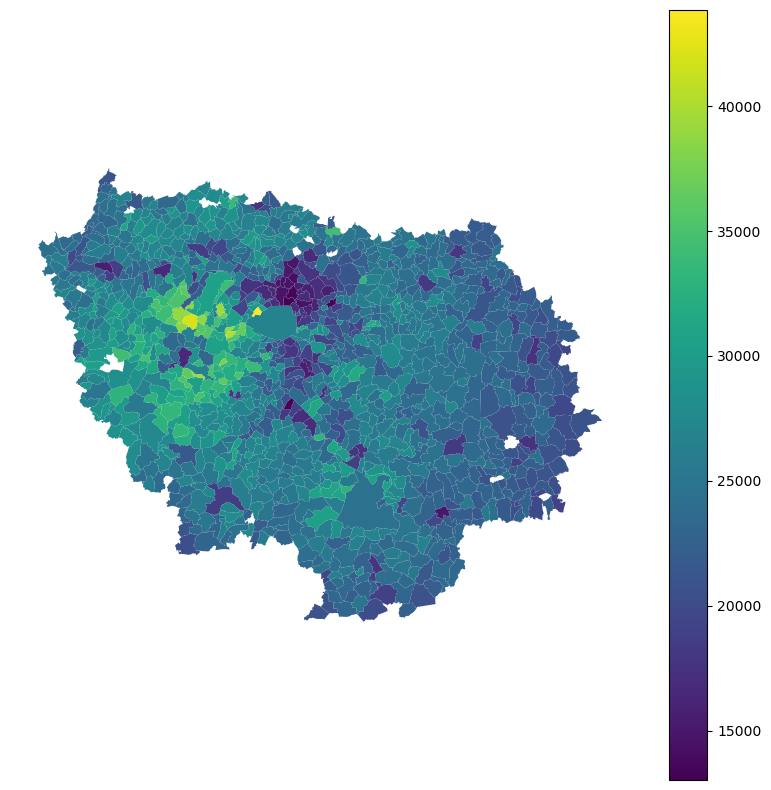

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1268 entries, 0 to 1287
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   NOM                            1268 non-null   object  
 1   INSEE_COM                      1268 non-null   int64   
 2   geometry                       1268 non-null   geometry
 3   LIBGEO                         1268 non-null   object  
 4   NBMENFISC16                    1250 non-null   float64 
 5   NBPERSMENFISC16                1250 non-null   float64 
 6   MED16                          1250 non-null   float64 
 7   surface_thermique_lot_median   1006 non-null   float64 
 8   age_logement_median            1006 non-null   float64 
 9   consommation_energie_median    1006 non-null   float64 
 10  nombre_dpe                     1006 non-null   float64 
 11  Energ                          1006 non-null   float64 
 12  classe_consommation_energi

In [1]:
# On exécute le code qui retraite les données

%run "./Pré_traitements_carto.ipynb"

In [2]:
# Installation du package nécessaire

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Calcul des points centraux des communes afin de centrer la carte
data_geo2 = communes_IDF[['INSEE_COM', 'geometry']]
data_geo2['Center_point'] = data_geo2['geometry'].centroid

/tmp/ipykernel_70493/398085374.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_geo2['Center_point'] = data_geo2['geometry'].centroid


In [5]:
data_geo2.head()

,INSEE_COM,geometry,Center_point
0,75056,"POLYGON ((2.36420 48.81640, 2.36333 48.81615, ...",POINT (2.34292 48.85661)
0,91689,"POLYGON ((2.32487 48.71100, 2.32483 48.71105, ...",POINT (2.32953 48.72969)
1,91645,"POLYGON ((2.23862 48.73577, 2.23860 48.73578, ...",POINT (2.25211 48.75043)
2,91064,"POLYGON ((2.20405 48.73695, 2.20392 48.73697, ...",POINT (2.20645 48.75659)
3,91526,"POLYGON ((2.24623 48.32961, 2.24645 48.33008, ...",POINT (2.23720 48.34517)


In [6]:
#Extraction de la latitude et de la longitude de ces points centraux
data_geo2["lat"] = data_geo2.Center_point.map(lambda p: p.x)
data_geo2["long"] = data_geo2.Center_point.map(lambda p: p.y)

In [7]:
data_geo2.head()

,INSEE_COM,geometry,Center_point,lat,long
0,75056,"POLYGON ((2.36420 48.81640, 2.36333 48.81615, ...",POINT (2.34292 48.85661),2.342919,48.856614
0,91689,"POLYGON ((2.32487 48.71100, 2.32483 48.71105, ...",POINT (2.32953 48.72969),2.329530,48.729693
1,91645,"POLYGON ((2.23862 48.73577, 2.23860 48.73578, ...",POINT (2.25211 48.75043),2.252107,48.750432
2,91064,"POLYGON ((2.20405 48.73695, 2.20392 48.73697, ...",POINT (2.20645 48.75659),2.206446,48.756590
3,91526,"POLYGON ((2.24623 48.32961, 2.24645 48.33008, ...",POINT (2.23720 48.34517),2.237202,48.345168


In [8]:
# Première visualisation

import folium

# Calcul du centre de la carte
data_geo2 = communes_IDF[['INSEE_COM', 'geometry']]
data_geo2['Center_point'] = data_geo2['geometry'].centroid
#Extract lat and lon from the centerpoint
data_geo2["lat"] = data_geo2.Center_point.map(lambda p: p.x)
data_geo2["long"] = data_geo2.Center_point.map(lambda p: p.y)

# Sortie de la carte primaire
m = folium.Map(location=[data_geo2['long'].mean(), data_geo2['lat'].mean()],
               zoom_start=9, tiles='cartodbpositron')
# m 
# (Visualisation non nécessaire)

/tmp/ipykernel_70493/1067594329.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_geo2['Center_point'] = data_geo2['geometry'].centroid


In [9]:
# Première carte relative aux revenus

folium.Choropleth(
    geo_data=communes_IDF,
    data = data_used,
    #data = f_data,
    columns = ['INSEE_COM', 'MED16'],
    key_on = 'feature.properties.INSEE_COM',
    nan_fill_color='White',
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="Revenu médian (€)"
    ).add_to(m)
# Ajout des infos bulles sur la carte

folium.features.GeoJson(
                    data=data_used,
                    name='Revenu median des ménages',
                    smooth_factor=2,
                    style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
                    tooltip=folium.features.GeoJsonTooltip(
                        fields=['NOM',
                                'NBMENFISC16',
                                'NBPERSMENFISC16',
                                'MED16'
                               ],
                        aliases=["<br>Commmune :",
                                 "<br>Nombre de ménages :",
                                 "<br>Population :",
                                 "<br>Revenu médian :"
                                ], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        ).add_to(m)   

#m

A ce stade, nous souhaitons afficher deux types d'informations sur une même carte interactive
-  La première affichera les données socio-démographiques relatives aux communes
-  La seconde renseignera sur les DPE dans les communes

In [10]:
data_used['Energ2']=1-data_used['Energ']
data_used.head()

,NOM,INSEE_COM,geometry,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,surface_thermique_lot_median,age_logement_median,consommation_energie_median,...,Energ,classe_consommation_energie_A,classe_consommation_energie_B,classe_consommation_energie_C,classe_consommation_energie_D,classe_consommation_energie_E,classe_consommation_energie_F,classe_consommation_energie_G,CE_Maj,Energ2
0,Paris,75056,"POLYGON ((2.36420 48.81640, 2.36333 48.81615, ...",Paris,1027657.0,2074629.5,26808.000000,43.815,66.0,253.0,...,0.577205,0.014166,0.018030,0.081262,0.309337,0.311912,0.173342,0.091951,E,0.422795
21,Achères-la-Forêt,77001,"POLYGON ((2.55546 48.37128, 2.55603 48.37126, ...",Achères-la-Forêt,460.0,1220.0,28596.000000,117.000,66.0,239.5,...,0.517787,0.033597,0.023715,0.079051,0.345850,0.312253,0.148221,0.057312,D,0.482213
22,Amillis,77002,"POLYGON ((3.15009 48.76276, 3.15025 48.76282, ...",Amillis,293.0,758.0,22876.666667,90.025,63.0,257.0,...,0.568627,0.009804,0.014706,0.066993,0.339869,0.334967,0.174837,0.058824,D,0.431373
23,Amponville,77003,"POLYGON ((2.50300 48.28510, 2.50287 48.28591, ...",Amponville,143.0,366.5,25606.250000,146.130,10.0,137.8,...,0.200000,0.266667,0.200000,0.133333,0.200000,0.133333,0.066667,0.000000,A,0.800000
24,Andrezel,77004,"POLYGON ((2.76939 48.60338, 2.76927 48.60347, ...",Andrezel,114.0,272.0,26871.304348,90.000,67.0,256.0,...,0.570552,0.006135,0.015337,0.110429,0.297546,0.365031,0.162577,0.042945,E,0.429448


On construit la carte avec toutes ses thématiques. Quatre étapes sont nécessaires

In [11]:
'''
Etape 1: On créée la carte de base et les deux couches séparément, 
Mais sans information au départ
'''
carte_fin = folium.Map(location=[data_geo2['long'].mean(), data_geo2['lat'].mean()],
               zoom_start=9.2, tiles=None)
cart_demo = folium.FeatureGroup(name='Données démographiques',overlay=False).add_to(carte_fin)
cart_dpe = folium.FeatureGroup(name='Diagnostics de performance énergétique',overlay=False).add_to(carte_fin)

In [12]:
'''
Etape 2
On ajoute la première couche de carte à la carte "cart_demo
'''

# La carte choropleth
echelle = (data_used['MED16'].quantile((0,0.2,0.4,0.6,0.8,1))).tolist()
nouv = folium.Choropleth(
    geo_data=communes_IDF,
    #geo_data=communes_IDF,
    data = data_used,
    columns = ['INSEE_COM', 'MED16'],
    key_on = 'feature.properties.INSEE_COM',
    fill_color='YlOrRd',
    nan_fill_color = 'White', # Couleur pour les données manquantes
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Revenu médian (€)",
    line_color = 'black',
    highlight = True
    ).geojson.add_to(cart_demo)

# Ajout des infos-bulles
folium.features.GeoJson(
                    data=data_used,
                    name='Revenu median des ménages',
                    smooth_factor=2,
                    style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
                    tooltip=folium.features.GeoJsonTooltip(
                        fields=['NOM',
                                'NBMENFISC16',
                                'NBPERSMENFISC16',
                                'MED16'
                               ],
                        aliases=["<br>Commmune :",
                                 "<br>Nombre de ménages :",
                                 "<br>Population :",
                                 "<br>Revenu médian :"
                                ], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        ).add_to(nouv)

In [13]:
'''
Etape 3:
On ajoute la deuxième couche choroplèthe à la carte "cart_demo
'''
# La carte choropleth
nouv2 = folium.Choropleth(
    geo_data=communes_IDF,
    data = data_used,
    columns = ['INSEE_COM', 'Energ2'],
    key_on = 'feature.properties.INSEE_COM',
    fill_color='YlGn',
    nan_fill_color = 'White', # Couleur pour les données manquantes
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Classe d'énergie majoritaire",
    line_color = 'black',
    highlight = True
    ).geojson.add_to(cart_dpe)

# Ajout des infos-bulles
folium.features.GeoJson(
                    data=data_used,
                    name="Proportion de ménages énergivores",
                    smooth_factor=2,
                    style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
                    tooltip=folium.features.GeoJsonTooltip(
                        fields=['NOM',
                                'Energ',
                                'classe_consommation_energie_A',
                                'classe_consommation_energie_B',
                                'classe_consommation_energie_C', 
                                'classe_consommation_energie_D',  
                                'CE_Maj'
                               ],
                        aliases=["<br>Commmune :",
                                 "<br>Proportion ménages énergivores :",
                                 "<br>Proportion de A :",
                                 "<br>Proportion de B :",
                                 "<br>Proportion de C :",
                                 "<br>Proportion de D :",
                                 "<br>Classe majoritaire :",
                                ], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        ).add_to(nouv2)

In [14]:
'''
Etape 4:
On ajoute des composantes à la carte: des tuiles et une barre de controle
'''
folium.TileLayer('cartodbdark_matter',overlay=True,name="View in Dark Mode").add_to(carte_fin)
folium.TileLayer('cartodbpositron',overlay=True,name="View in Light Mode").add_to(carte_fin)
folium.LayerControl(collapsed=False).add_to(carte_fin)